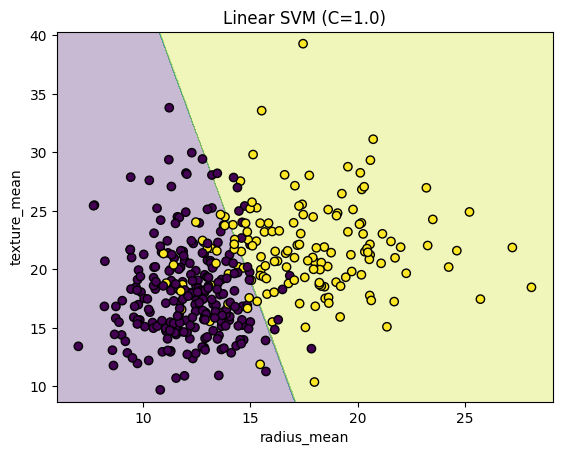

Linear SVM Accuracy: 0.8947368421052632
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       107
           1       0.94      0.77      0.84        64

    accuracy                           0.89       171
   macro avg       0.91      0.87      0.88       171
weighted avg       0.90      0.89      0.89       171



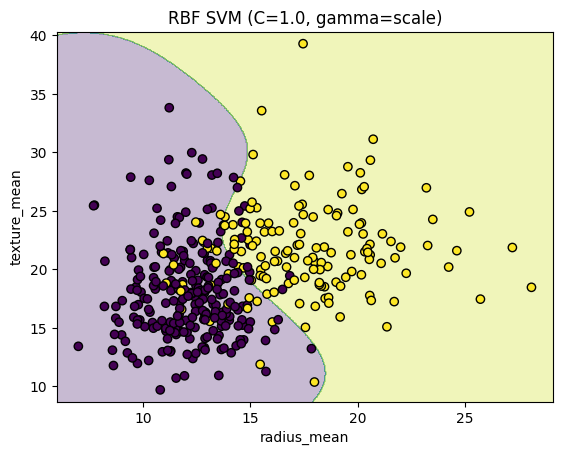

RBF SVM Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       107
           1       1.00      0.81      0.90        64

    accuracy                           0.93       171
   macro avg       0.95      0.91      0.92       171
weighted avg       0.94      0.93      0.93       171

Best parameters: {'C': 1, 'gamma': 0.01}


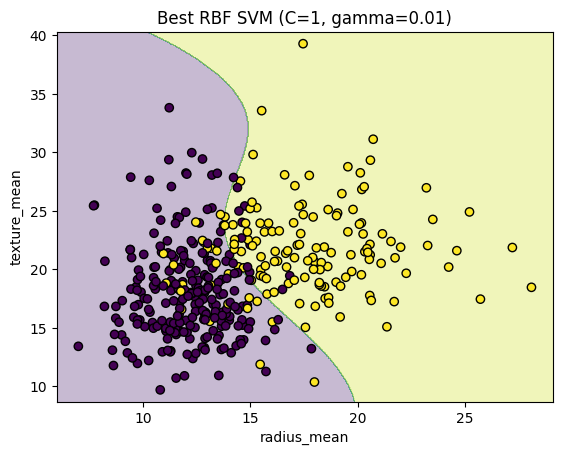

Best RBF SVM Accuracy: 0.9181286549707602
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       107
           1       1.00      0.78      0.88        64

    accuracy                           0.92       171
   macro avg       0.94      0.89      0.91       171
weighted avg       0.93      0.92      0.92       171

5-fold CV (Linear SVM): [0.84210526 0.86842105 0.88596491 0.9122807  0.89380531]
Mean CV accuracy (Linear SVM): 0.8805154479118149
5-fold CV (Best RBF SVM): [0.85964912 0.87719298 0.9122807  0.92982456 0.91150442]
Mean CV accuracy (Best RBF SVM): 0.8980903586399627


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

csv_path = '/content/breast-cancer.csv'
label_column = 'diagnosis'

df = pd.read_csv(csv_path)
df[label_column] = df[label_column].map({'B': 0, 'M': 1})
if 'id' in df.columns:
    df = df.drop(columns=['id'])

y = df[label_column].values
X = df.drop(columns=[label_column]).values

feature_names = ['radius_mean', 'texture_mean']
X_vis = df[feature_names].values

X_train, X_test, y_train, y_test = train_test_split(
    X_vis, y, test_size=0.3, random_state=42, stratify=y
)

def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 500),
        np.linspace(y_min, y_max, 500)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

linear_svc = svm.SVC(kernel='linear', C=1.0)
linear_svc.fit(X_train, y_train)
plot_decision_boundary(linear_svc, X_train, y_train, 'Linear SVM (C=1.0)')

y_pred_lin = linear_svc.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_lin))
print(classification_report(y_test, y_pred_lin))

rbf_svc = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svc.fit(X_train, y_train)
plot_decision_boundary(rbf_svc, X_train, y_train, 'RBF SVM (C=1.0, gamma=scale)')

y_pred_rbf = rbf_svc.predict(X_test)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

tuned_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}
grid = GridSearchCV(svm.SVC(kernel='rbf'), tuned_params, cv=5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
best_svc = grid.best_estimator_
plot_decision_boundary(best_svc, X_train, y_train,
                       f"Best RBF SVM (C={grid.best_params_['C']}, gamma={grid.best_params_['gamma']})")

y_pred_best = best_svc.predict(X_test)
print("Best RBF SVM Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

df_vis = df[feature_names]
X_full = df_vis.values
cv_scores_lin = cross_val_score(linear_svc, X_full, y, cv=5)
cv_scores_rbf = cross_val_score(best_svc, X_full, y, cv=5)
print("5-fold CV (Linear SVM):", cv_scores_lin)
print("Mean CV accuracy (Linear SVM):", cv_scores_lin.mean())
print("5-fold CV (Best RBF SVM):", cv_scores_rbf)
print("Mean CV accuracy (Best RBF SVM):", cv_scores_rbf.mean())
